In [1]:
library('tidyverse')
library('ggrepel')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘ggrepel’ was built under R version 4.2.2”


In [2]:
nwsl = read_csv("https://raw.githubusercontent.com/gavinr/usa-soccer/master/nwsl.csv", col_types=cols())

nwsl |> head()

team,city,state,latitude,longitude,stadium,stadium_capacity,founded,joined,head_coach,url,wikipedia_url,logo_url
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Angel City FC,Los Angeles,California,34.01300,-118.28500,Banc of California Stadium,22000,2020,2022,Freya Coombe,https://angelcity.com/,https://en.wikipedia.org/wiki/Angel_City_FC,https://upload.wikimedia.org/wikipedia/en/thumb/6/60/Angel_City_FC_logo.svg/170px-Angel_City_FC_logo.svg.png
Chicago Red Stars,Bridgeview,Illinois,41.76472,-87.80611,SeatGeek Stadium,20000,2006,2013,Chris Petrucelli,http://www.chicagoredstars.com/,https://en.wikipedia.org/wiki/Chicago_Red_Stars,https://upload.wikimedia.org/wikipedia/en/thumb/8/8c/Chicago_Red_Stars_logo.svg/180px-Chicago_Red_Stars_logo.svg.png
Houston Dash,Houston,Texas,29.75220,-95.35240,PNC Stadium,7000,2013,2014,Juan Carlos Amorós,https://www.houstondynamofc.com/houstondash,https://en.wikipedia.org/wiki/Houston_Dash,https://upload.wikimedia.org/wikipedia/en/thumb/6/68/Houston_Dash_2020_logo.svg/180px-Houston_Dash_2020_logo.svg.png
Kansas City Current,Kansas City,Kansas,39.12140,-94.82100,Children's Mercy Park,18467,2020,2021,Matt Potter,https://www.kansascitycurrent.com/,https://en.wikipedia.org/wiki/Kansas_City_Current,https://upload.wikimedia.org/wikipedia/en/thumb/1/1a/Kansas_City_Current_logo.svg/220px-Kansas_City_Current_logo.svg.png
NJ/NY Gotham FC,Harrison,New Jersey,40.73667,-74.15028,Red Bull Arena,25000,2007,2013,Hue Menzies,https://www.gothamfc.com/,https://en.wikipedia.org/wiki/NJ/NY_Gotham_FC,https://upload.wikimedia.org/wikipedia/en/thumb/3/36/NJ_NY_Gotham_FC_logo.svg/170px-NJ_NY_Gotham_FC_logo.svg.png
North Carolina Courage,Cary,North Carolina,35.78616,-78.75511,WakeMed Soccer Park,10000,2017,2017,Sean Nahas,https://www.nccourage.com/,https://en.wikipedia.org/wiki/North_Carolina_Courage,https://upload.wikimedia.org/wikipedia/en/thumb/a/ab/North_Carolina_Courage_logo.svg/180px-North_Carolina_Courage_logo.svg.png


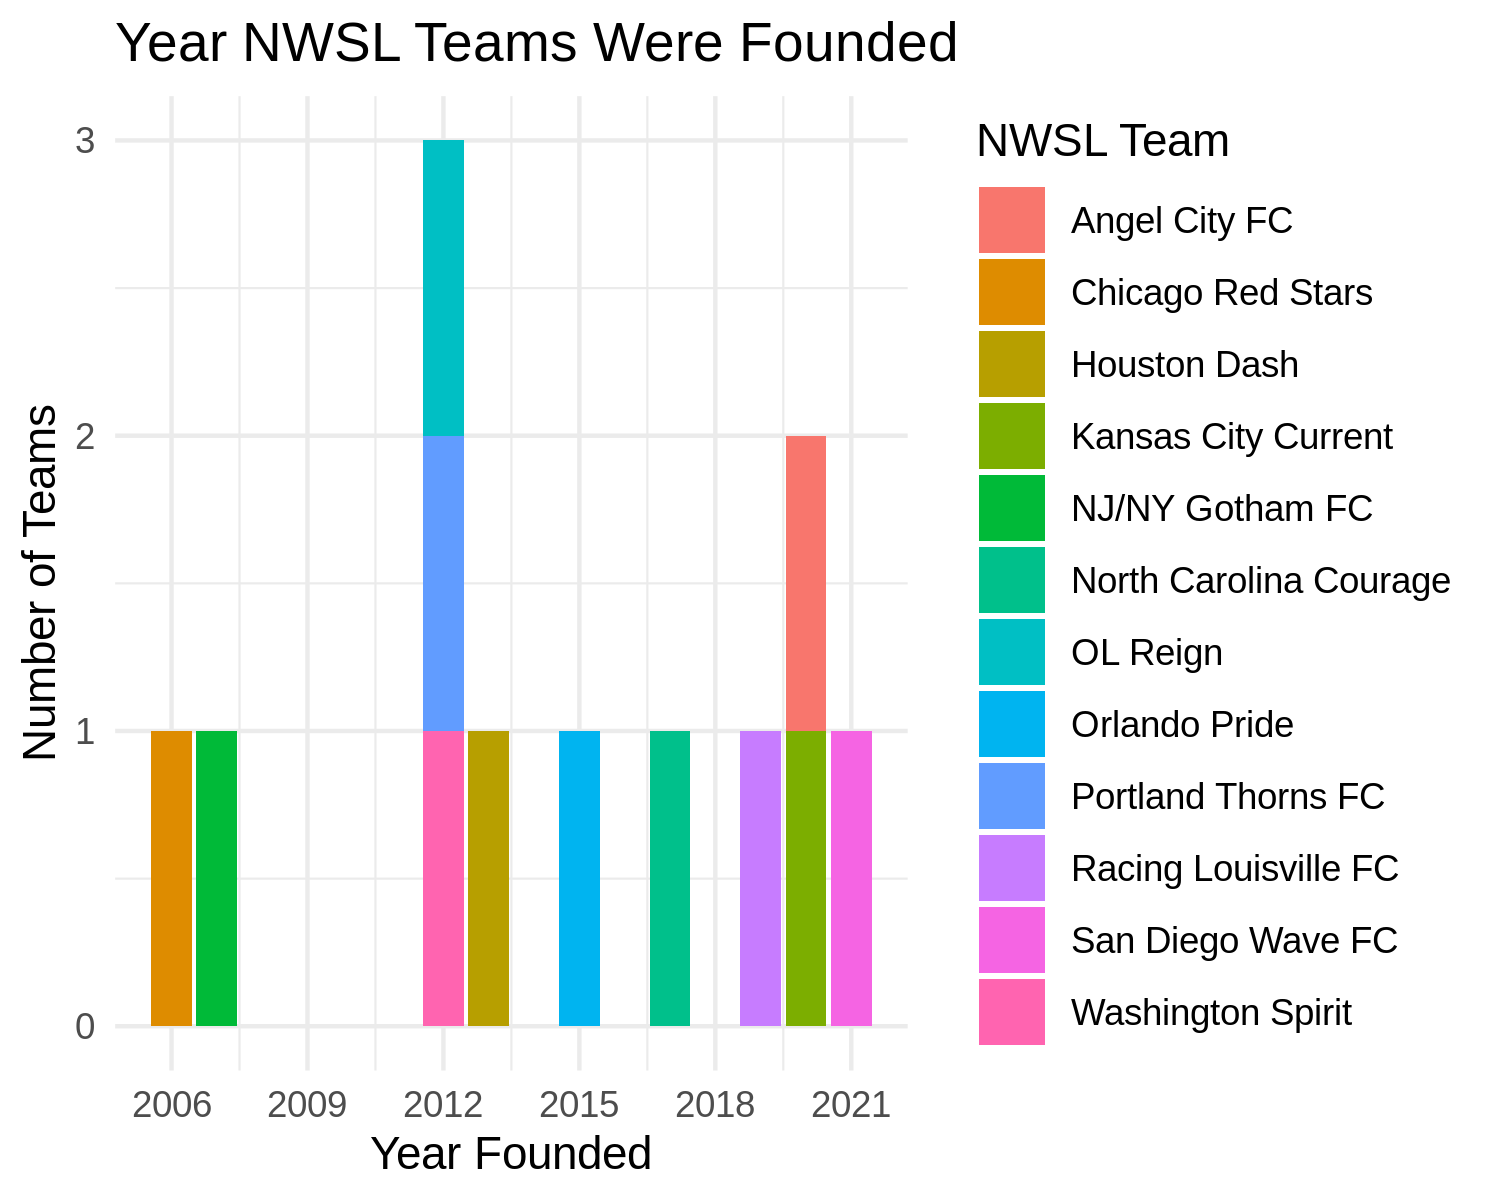

In [5]:
#Figure 1

p = ggplot(nwsl, aes(x=founded, fill=team))
p = p + geom_bar() + scale_x_continuous(breaks=c(2006, 2009, 2012, 2015, 2018, 2021))
p = p + theme_minimal() + labs(title="Year NWSL Teams Were Founded", x="Year Founded", y="Number of Teams") 
p = p + scale_fill_discrete(name="NWSL Team")
p 

Figure 1 was created as a way for the audience to visualize how many National Women's Soccer League Teams (NWSL) were founded each year. This bar chart was coded such that the year the team was founded is displayed on the x-axis and the number of teams founded that year is displayed on the y-axis. The first team was founded in 2006 and the last team was founded in 2021, so the x-axis was scaled so that it displayed the years 2006-2021 in 3-year intervals.  

In [6]:
#Figure 2 

nwsl2 = nwsl |>
    summarize(
        obs = n(), 
        n_above_20000 = sum(stadium_capacity >= 20000, na.rm=TRUE),
        frac_above_20000 = sum(stadium_capacity >= 20000, na.rm=TRUE) / n())

nwsl2 |> head()

obs,n_above_20000,frac_above_20000
<int>,<int>,<dbl>
12,7,0.5833333


Figure 2 was created to determine the number of teams with stadiums that can hold at least 20,000 people. To do so, the data was manipulated using the summarize function within the dpylr package so that a table could be created displaying the fraction of teams with a stadium capacity of at least 20,000; the column frac_above_20000 was created by calculating the total number of stadiums with a capacity of at least 20,000 people (n_above_20000) and dividing that number by the number of teams (obs = n()).

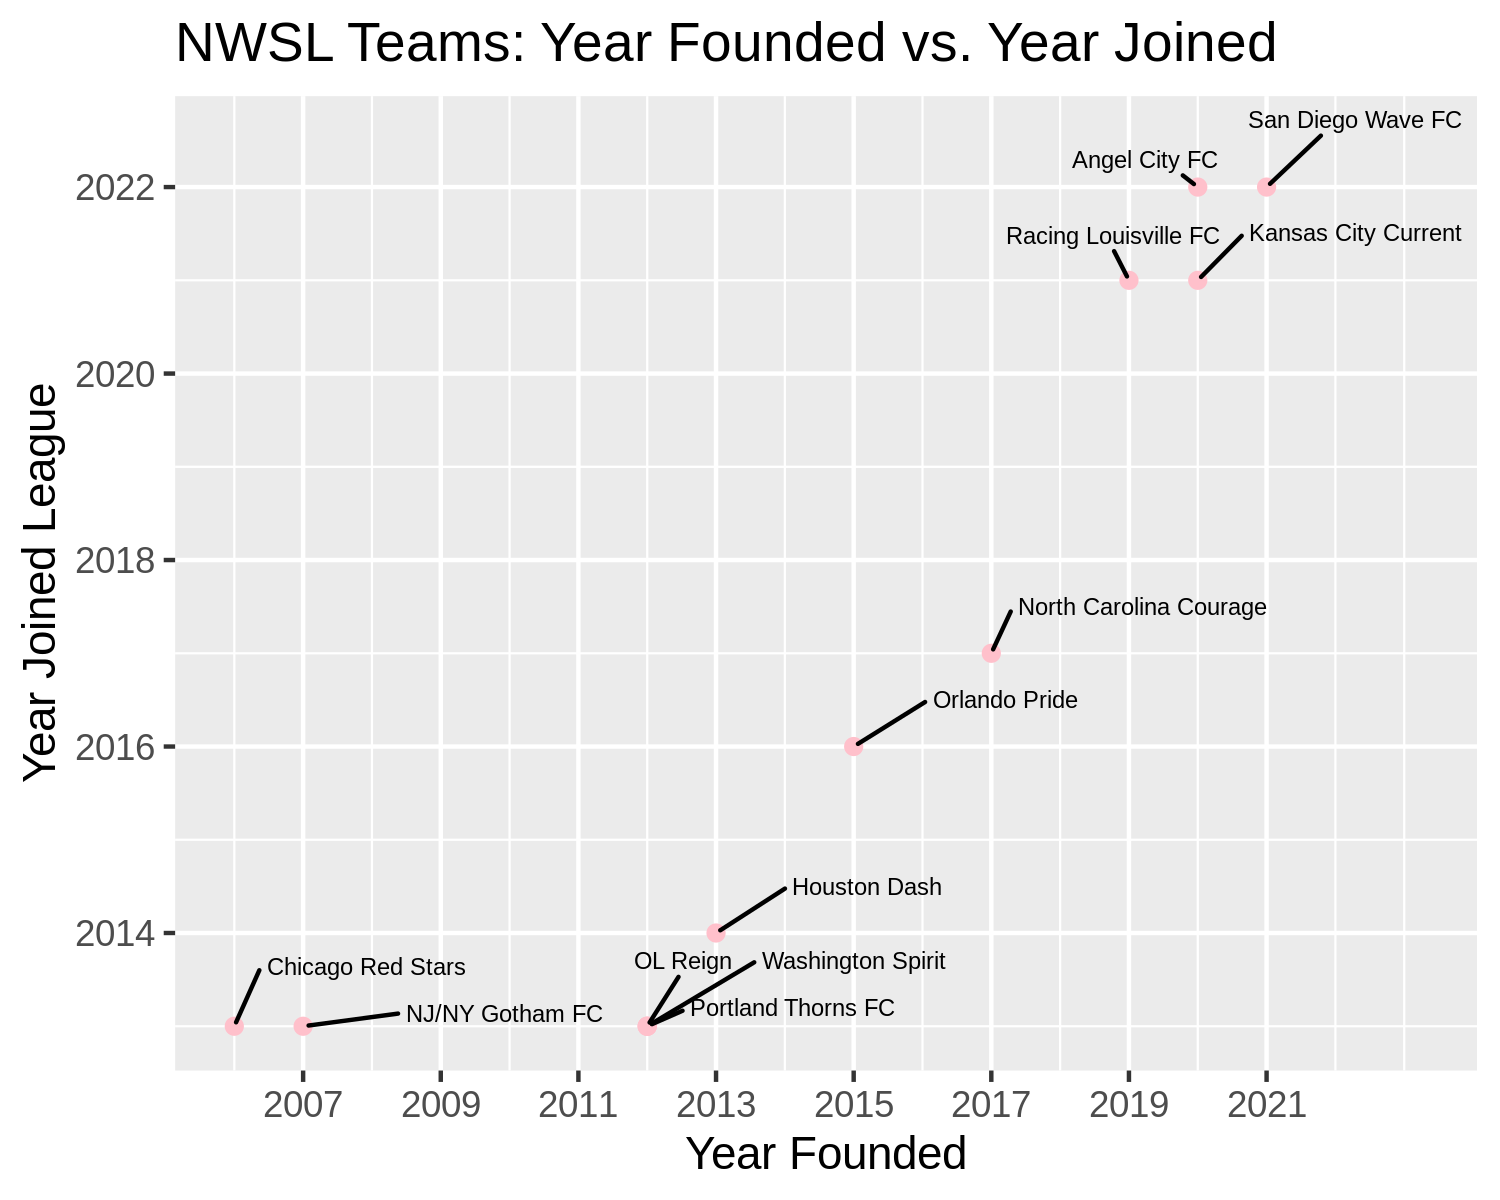

In [8]:
#Figure 3

p = ggplot(nwsl, aes(x=founded, y=joined, label=team))
p = p + geom_point(color='pink') + scale_x_continuous(breaks=c(2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021)) 
p = p + scale_y_continuous(breaks=c(2012, 2014, 2016, 2018, 2020, 2022))
p = p = p + labs(title="NWSL Teams: Year Founded vs. Year Joined", x="Year Founded", y="Year Joined League")
p = p + geom_text_repel(size=2, min.segment.length = 0, nudge_x=2.2, nudge_y=0.5)
p

Figure 3 was created as a way for the audience to visualize the comparison between when an NWSL team was founded vs. when the team actually joined the league. This scatter plot was coded such that the year the team was founded is displayed on the x-axis and the year the team joined the league is displayed on the y-axis. Labels were added to each data point by attaching the ggrepel package and using the geom geom_text_repel so that the audience can tell which NWSL team(s) the data point represents. 